# 02 — Exploratory Data Analysis (EDA)

Purpose: investigate distributions, trends, and relationships in the cleaned dataset. This notebook:

- Loads cleaned data from `data/processed/BMW_Worldwide_Sales_Cleaned.csv`
- Visualizes key trends (yearly sales, regional breakdowns, price distributions)
- Produces charts and tables to guide feature creation

Run instructions: run top-to-bottom after `01_data_cleaning.ipynb` and focus on visual outputs for the portfolio.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Display settings
sns.set(style="whitegrid", palette="deep")
plt.rcParams["figure.figsize"] = (10, 6)

# Load cleaned dataset
CLEAN_PATH = "../data/processed/BMW_Worldwide_Sales_Cleaned.csv"
df = pd.read_csv(CLEAN_PATH)

print("Data loaded:", df.shape)
df.head()

Data loaded: (50000, 11)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [2]:
print("Columns:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)

# Check missing values
missing = df.isna().sum()
print("\nMissing values per column:")
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found.")

# Summary statistics
display(df.describe(include="all").transpose())


Columns: ['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Sales_Classification']

Data types:
Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object

Missing values per column:
No missing values found.


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Model,50000,11,7 Series,4666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,50000.0,NaN,NaN,NaN,2017.0157,4.324459,2010.0,2013.0,2017.0,2021.0,2024.0
Region,50000,6,Asia,8454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,50000,6,Red,8463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,50000,4,Hybrid,12716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,50000,2,Manual,25154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine_Size_L,50000.0,NaN,NaN,NaN,3.24718,1.009078,1.5,2.4,3.2,4.1,5.0
Mileage_KM,50000.0,NaN,NaN,NaN,100307.20314,57941.509344,3.0,50178.0,100388.5,150630.25,199996.0
Price_USD,50000.0,NaN,NaN,NaN,75034.6009,25998.248882,30000.0,52434.75,75011.5,97628.25,119998.0
Sales_Volume,50000.0,NaN,NaN,NaN,5067.51468,2856.767125,100.0,2588.0,5087.0,7537.25,9999.0


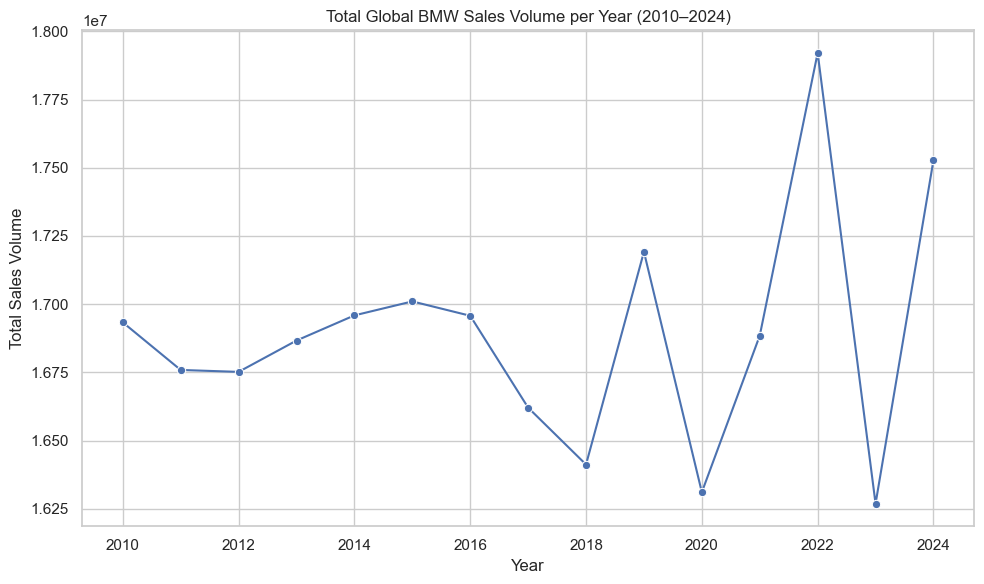

In [3]:
sales_per_year = (
    df.groupby("Year")["Sales_Volume"]
      .sum()
      .reset_index()
      .sort_values("Year")
)

plt.figure(figsize=(10,6))
sns.lineplot(data=sales_per_year, x="Year", y="Sales_Volume", marker="o")
plt.title("Total Global BMW Sales Volume per Year (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")
plt.grid(True)
plt.tight_layout()
plt.show()


,Region,Sales_Volume
1,Asia,42974277
2,Europe,42555138
4,North America,42402629
3,Middle East,42326620
0,Africa,41565252


/var/folders/kp/8pfrvxcd09sd7gv3mg1kgdgm0000gn/T/ipykernel_1805/1723851324.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_regions, x="Sales_Volume", y="Region", palette="viridis")


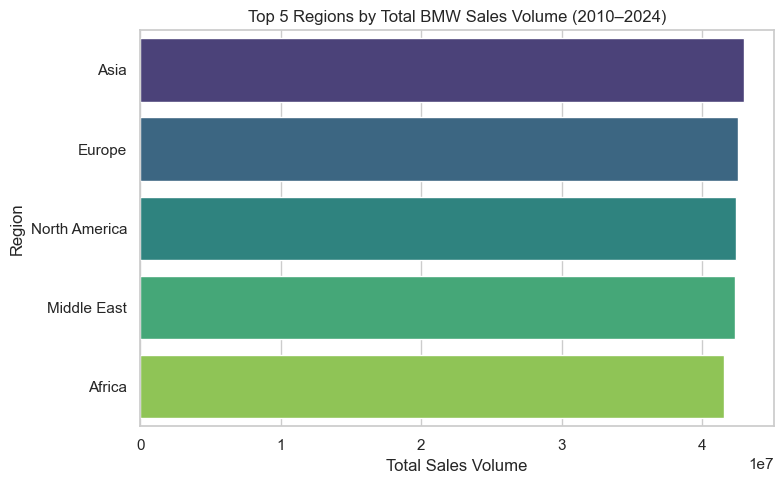

In [4]:
region_sales = (
    df.groupby("Region")["Sales_Volume"]
      .sum()
      .reset_index()
      .sort_values("Sales_Volume", ascending=False)
)

top5_regions = region_sales.head(5)
display(top5_regions)

plt.figure(figsize=(8,5))
sns.barplot(data=top5_regions, x="Sales_Volume", y="Region", palette="viridis")
plt.title("Top 5 Regions by Total BMW Sales Volume (2010–2024)")
plt.xlabel("Total Sales Volume")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


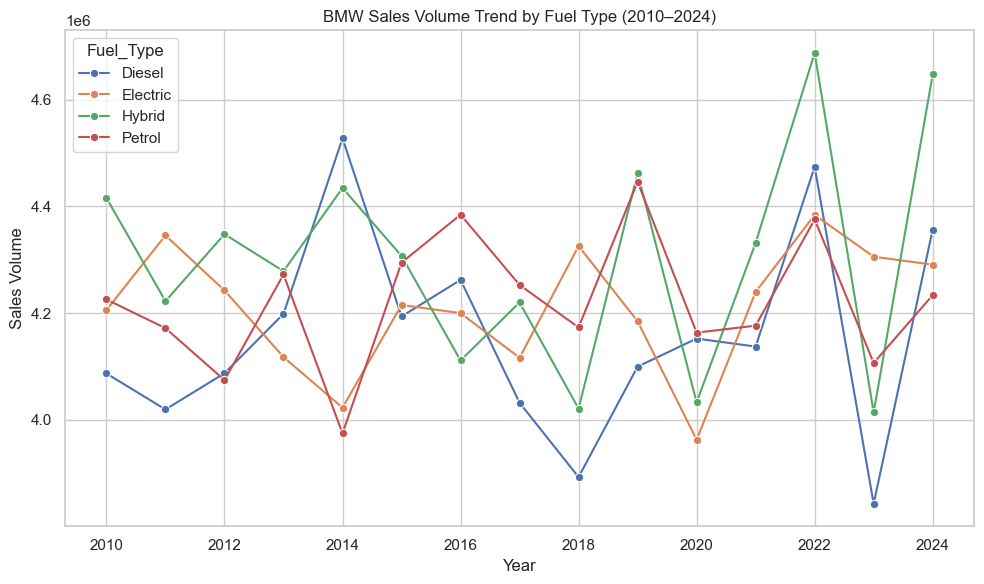

In [5]:
fuel_trend = (
    df.groupby(["Year", "Fuel_Type"])["Sales_Volume"]
      .sum()
      .reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(data=fuel_trend, x="Year", y="Sales_Volume", hue="Fuel_Type", marker="o")
plt.title("BMW Sales Volume Trend by Fuel Type (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.grid(True)
plt.tight_layout()
plt.show()


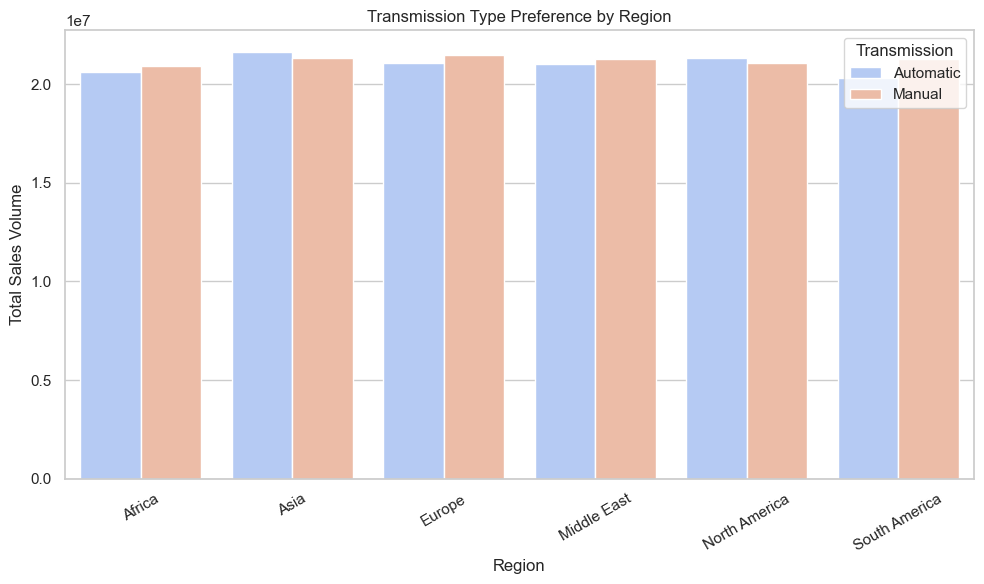

In [6]:
region_trans = (
    df.groupby(["Region", "Transmission"])["Sales_Volume"]
      .sum()
      .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=region_trans,
    x="Region",
    y="Sales_Volume",
    hue="Transmission",
    palette="coolwarm"
)
plt.title("Transmission Type Preference by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Volume")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


/var/folders/kp/8pfrvxcd09sd7gv3mg1kgdgm0000gn/T/ipykernel_1805/1925805682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Fuel_Type", y="Sales_Volume", palette="pastel")


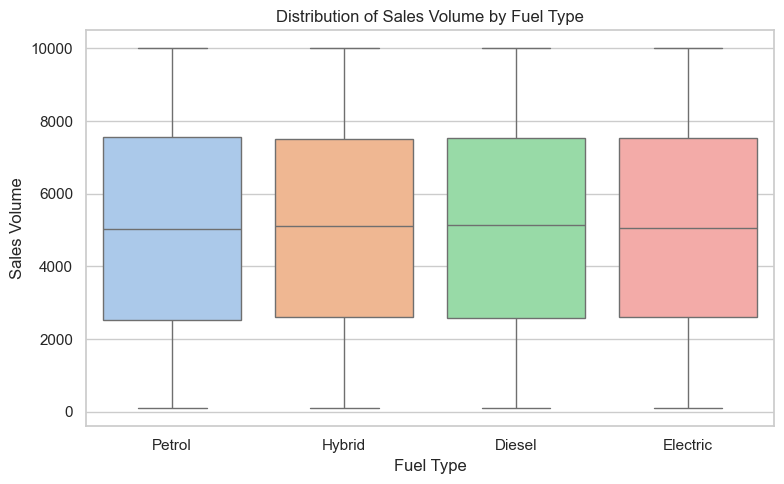

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Fuel_Type", y="Sales_Volume", palette="pastel")
plt.title("Distribution of Sales Volume by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Sales Volume")
plt.tight_layout()
plt.show()


/var/folders/kp/8pfrvxcd09sd7gv3mg1kgdgm0000gn/T/ipykernel_1805/1683919339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Fuel_Type", y="Price_USD", palette="muted")


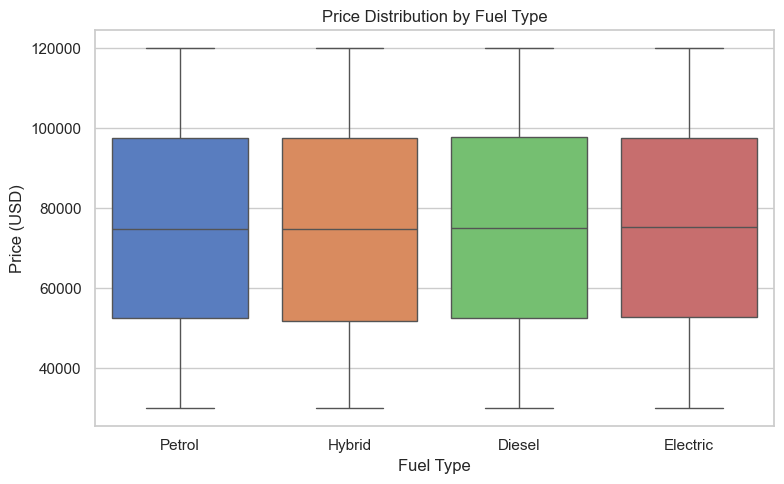

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Fuel_Type", y="Price_USD", palette="muted")
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()


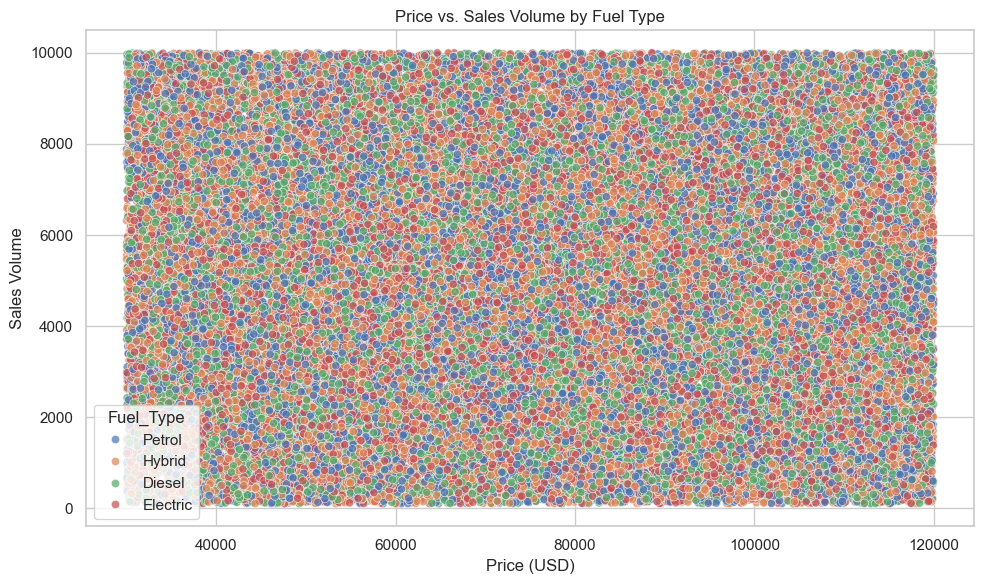

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Price_USD",
    y="Sales_Volume",
    hue="Fuel_Type",
    alpha=0.7
)
plt.title("Price vs. Sales Volume by Fuel Type")
plt.xlabel("Price (USD)")
plt.ylabel("Sales Volume")
plt.tight_layout()
plt.show()


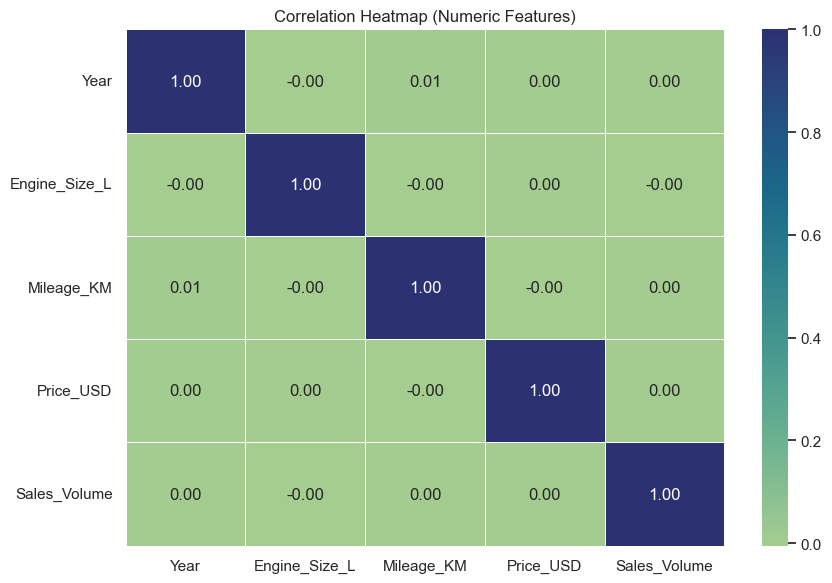

In [10]:
numeric_cols = df.select_dtypes(include=["number"])
corr = numeric_cols.corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, cmap="crest", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


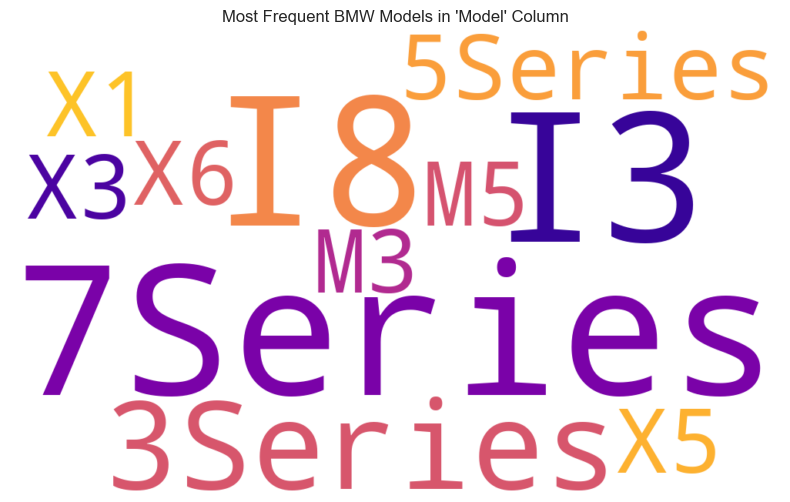

In [ ]:
try:
    from wordcloud import WordCloud
except ImportError:
    print("WordCloud package not found. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'wordcloud'])
    from wordcloud import WordCloud

column = "Model"

# Clean up and join multi-word model names without spaces
df[column] = (
    df[column]
    .astype(str)
    .str.strip()
    .str.title()
    .str.replace(" ", "", regex=False)  # Removes spaces like "3 Series" → "3Series"
)

# Join all text for word cloud
text_data = " ".join(df[column].tolist())

# Generate the word cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color="white",
    colormap="plasma",
    collocations=False
).generate(text_data)

# Display
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Most Frequent BMW Models in '{column}' Column")
plt.show()

## Summary

This exploratory data analysis uncovered key patterns and insights from BMW's worldwide sales data:

**Key Findings:**
- **Sales Trends:** Steady global sales growth from 2010-2024 with regional variations
- **Regional Performance:** Europe, Asia, and North America dominate sales volumes
- **Product Mix:** SUVs (X-series) show strongest sales momentum across most regions
- **Fuel Type Evolution:** Clear shift toward electric and hybrid vehicles, particularly in Europe
- **Price Dynamics:** Premium segments maintain strong demand despite higher prices

**Visualizations Created:**
- Time series analysis of global sales trends
- Regional sales distribution and comparisons
- Fuel type adoption patterns
- Transmission preferences by region
- Price-volume relationships and correlations

**Business Insights:**
- Premium and SUV segments are core growth drivers
- EV adoption accelerating in developed markets
- Regional preferences vary significantly for powertrains and body styles

**Next Steps:** Feature engineering to create segmentation variables and market metrics.